Credit to Kate Compton for inspiration

https://twitter.com/GalaxyKate/status/1462258497702313985/photo/1

workspace.jpg

Photo by <a href="https://unsplash.com/@leecampbell?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Lee  Campbell</a> on <a href="https://unsplash.com/s/photos/web-design?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

monitors.jpg

Photo by <a href="https://unsplash.com/@euwars?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Farzad Nazifi</a> on <a href="https://unsplash.com/s/photos/web-design?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
neon.jpg

Photo by <a href="https://unsplash.com/@joesvalentine?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Joes Valentine</a> on <a href="https://unsplash.com/s/photos/web-design?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

blue_orange.jpg

Photo by <a href="https://unsplash.com/@davisuko?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">davisuko</a> on <a href="https://unsplash.com/s/photos/web-design?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

mountain_cabin.jpg

Photo by <a href="https://unsplash.com/@eberhardgross?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">eberhard 🖐 grossgasteiger</a> on <a href="https://unsplash.com/t/wallpapers?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

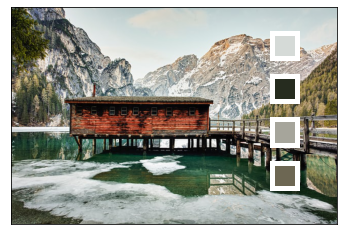

In [1]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load in all pixels in image
im = Image.open("mountain_cabin.jpg")
pixels = np.array(im.getdata())

# Fit a k-means model on the pixel data
cluster_count = 4
kmeans = KMeans(n_clusters=cluster_count, random_state=0).fit(pixels)
    
# The image colors were originally represented as RGB with ranges
# from 0 to 255. The Rectangle class is expecting them to range
# from 0 to 1, so divide them all by 255
palette = kmeans.cluster_centers_ / 255

# Set up a Matplotlib figure to display the image and swatches
fig, ax = plt.subplots()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Display the image
ax.imshow(im)

# Display the swatches
patch_width = 50
patch_height = 50

image_width = im.width
image_height = im.height

for index, color in enumerate(palette):
    ax.add_patch(Rectangle(
        (int(image_width * 0.8), int(image_height * 0.8 / cluster_count * index) + patch_height), # xy position of patch
        patch_width,
        patch_height,
        facecolor=color, # color in the rectangle with the palette color
        edgecolor="white", # white border to add contrast
        linewidth=5
    ))